<a href="https://colab.research.google.com/github/kakdevedant2018/PML/blob/main/DGA_detection_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk

In [ ]:
pip install nltk

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DGA_data/dga_data.csv")

In [ ]:
#Null values drop
df = df.dropna()

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df

,isDGA,domain,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker
...,...,...,...,...
159995,legit,manhunt,manhunt.net,alexa
159996,legit,yupptv,yupptv.com,alexa
159997,legit,bbcmundo,bbcmundo.com,legit
159998,legit,kanogames,kanogames.com,legit


In [ ]:
#Removing unnecessary columns.
df=df.drop(["subclass"],axis=1)

In [ ]:
df

,isDGA,domain,host
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net
4,dga,jpqftymiuver,jpqftymiuver.ru
...,...,...,...
159995,legit,manhunt,manhunt.net
159996,legit,yupptv,yupptv.com
159997,legit,bbcmundo,bbcmundo.com
159998,legit,kanogames,kanogames.com


# Feature Generation
used to extract the features.

The linguistic features are 



# Number of characters.

In [ ]:
df["num_characters"]=df["host"].apply(len)

In [ ]:
df.head(3)

,isDGA,domain,host,num_characters
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17


# Vowel count

In [ ]:
df['Vowels'] = df.host.str.lower().str.count(r'[aeiou]')

In [ ]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4


# Number of consonant

In [ ]:
df['Consonant'] = df.host.str.lower().str.count(r'[a-z]') - df['Vowels']

In [ ]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12


#  Unique character rate.
It is the measure of unique characters and if lower unique character rate implies a DGA domain.


In [ ]:
# df["Unique Character rate"] = len(set(df["host"]))/df["host"].str.len()

In [ ]:
s = "vedant"
print(len(set(s))/len(s))

1.0


In [ ]:
len(set(df["domain"]))

159998

In [ ]:
# created the list of domain unique character length.
l=[]
for i in df["domain"]:
  l.append(len(set(i)))

In [ ]:
l[0]

21

In [ ]:
l1=[]
for i in df["domain"]:
  l1.append(len(i))

In [ ]:
# taking unique character ratio.
k=[]
for i in range(159998 ):
  j=l[i]/l1[i]
  k.append(j)
df["Unique characters ratio"]=k

In [ ]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.807692
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.714286
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.714286


# Percentage of numerical characters:


In [ ]:
domain =[]

In [ ]:
for i in df["domain"]:
  domain.append(i)

In [ ]:
alpha=[]
numeric=[]
for i in domain:
  c_alpha=0
  c_digit=0
  for j in i:
    if j.isdigit():
      c_digit+=1
    else:
      c_alpha+=1
  alpha.append(c_alpha)
  numeric.append(c_digit)
  
  #res.append[int(i) for i  in   if i.isdigit()]


In [ ]:
per_n_c=[]
for i in range(len(alpha)):
  per_n_c.append(alpha[i]/(alpha[i]+numeric[i]))


In [ ]:
df["percentage of numeric characters"]=per_n_c

In [ ]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.807692,0.653846
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.714286,1.000000
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.714286,1.000000


#  Entropy 
### It is the measure of randomness that is DGA domain has higher uncertainity than of normal domain.
## In DGA there is no meaningful pattern.

In [ ]:
from collections import Counter
from math import log
def shannon(string):
  counts = Counter(string)
  frequencies = ((i / len(string)) for i in counts.values())
  return - sum(f * log(f, 2) for f in frequencies)
#s = lambda i : - sum(f * log(f, 2) for f in ((j / len(i)) for j in Counter(i).values()))



In [ ]:
s_list=[]
for i in df["host"]:
  s_list.append(shannon(i))
df["Shannon_Entropy"]=s_list

In [ ]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.807692,0.653846,4.440224
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.714286,1.000000,3.616875
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.714286,1.000000,3.572469



# N-Gram Feature
If a domain is legit it is more likely to exists in the Alexa ranking list
Thus it is necessary to find the similarity of legit domains.
we build a legit text corpus.


# Dictionary matching

“How much of the string can be explained by a dictionary?"

Therfore, I created the function ------- in the DGA package to return the percentage of characters that are in the dictionary.

# similarity with legit domain.

In [ ]:
# list1 = []
# for index, rows in df.iterrows():
#   if rows["isDGA"]== "legit":
#     list1.append(rows["domain"])

In [ ]:
# list1[0:10]

In [ ]:
# # code for creating n grams from domain.
# from nltk import ngrams
# d=[]
# for i in list1:
#   l1 = list(ngrams(str(i),3))
#   for i in l1: 
#     sub=[]
#     for j in i:
#       sub.append(j)
    
#     d.append("".join(sub))

# print(len(d))

In [ ]:
# # code for creating n grams from domain.
# from nltk import ngrams
# for i in list1:
#   l1 = list(ngrams(str(i),5))
#   for i in l1: 
#     sub=[]
#     for j in i:
#       sub.append(j)
    
#     d.append("".join(sub))

# print(len(d))

In [ ]:
# from nltk.util import ngrams

# def jaccard_similarity(str1, d, n):
#   str1_bigrams=[]
#   l1 = list(ngrams(str1,n))
#   for i in l1: 
#     sub=[]
#     for j in i:
#       sub.append(j)
    
#     str1_bigrams.append("".join(sub))
#   intersection = len(list(set(str1_bigrams).intersection(set(d))))
#   union = (len(set(str1_bigrams)) + len(set(d))) - intersection

#   return float(intersection) / union

In [ ]:
# grams = []
# import math
# for i in df["domain"]:
#   similarities = [jaccard_similarity(str(i), d, 3)]
#   avg_similarity= sum(similarities) / len(similarities)
#   grams.append(avg_similarity)
  
# df["3_grams"] = grams


In [ ]:
df

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.807692,0.653846,4.440224
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.714286,1.000000,3.616875
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.714286,1.000000,3.572469
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,29,4,14,0.760000,0.600000,4.444188
4,dga,jpqftymiuver,jpqftymiuver.ru,15,4,10,1.000000,1.000000,3.640224
...,...,...,...,...,...,...,...,...,...
159995,legit,manhunt,manhunt.net,11,3,7,0.857143,1.000000,2.845351
159996,legit,yupptv,yupptv.com,10,2,7,0.833333,1.000000,3.121928
159997,legit,bbcmundo,bbcmundo.com,12,3,8,0.875000,1.000000,2.918296
159998,legit,kanogames,kanogames.com,13,5,7,0.888889,1.000000,3.238901


#number of dot counts


In [ ]:
df['ndots']=df['domain'].str.count("\.")

In [ ]:
df[df["ndots"]!=0]

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy,ndots


# Number of Consecutive Vowels

In [ ]:
def count_vowels(word):
    vowel_count = 0

    current = 0;
    sequence = 1;
    while sequence < (len(word)):
        if (word[current] == 'a' or word[current] == 'e' or word[current] == 'i' or word[current] == 'o' or word[current] == 'u') \
                and (word[sequence] == 'a' or word[sequence] == 'e' or word[sequence] == 'i' or word[sequence] == 'o' or word[sequence] == 'u'):
            vowel_count += 1
        current += 1
        sequence += 1

    return vowel_count


In [ ]:
l=[]
for i in df["domain"]:
  l.append(count_vowels(i))
df["Number of consecutive vowels"] = l

In [ ]:
df[df['Number of consecutive vowels']>2].head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy,ndots,Number of consecutive vowels
8,dga,xkoihiygtanuio,xkoihiygtanuio.ru,17,8,8,0.785714,1.0,3.572469,0,3
137,dga,ileeiaexahaawgxfpenxj,ileeiaexahaawgxfpenxj.org,25,11,13,0.571429,1.0,3.653661,0,5
147,dga,yaeiovmkmssxyim,yaeiovmkmssxyim.ru,18,6,11,0.666667,1.0,3.572431,0,3


## Number of Consecutive Vowels

In [ ]:
import re

def find_consonants(string):
    # find all non-vovels occuring 1 or more times:
    q = re.findall(r'[^aeiou]+', string)
    l=max(q, key=len)
    if l:
      return len(l)

In [ ]:
df=df.dropna()

In [ ]:
# import numpy as np
# l=[]
# for i in df["domain"]:
#   l.append(find_consonants(i))
# df["Number of consecutive consonants"] = l

In [ ]:
df

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy,ndots,Number of consecutive vowels
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.807692,0.653846,4.440224,0,0
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.714286,1.000000,3.616875,0,0
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.714286,1.000000,3.572469,0,0
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,29,4,14,0.760000,0.600000,4.444188,0,0
4,dga,jpqftymiuver,jpqftymiuver.ru,15,4,10,1.000000,1.000000,3.640224,0,1
...,...,...,...,...,...,...,...,...,...,...,...
159995,legit,manhunt,manhunt.net,11,3,7,0.857143,1.000000,2.845351,0,0
159996,legit,yupptv,yupptv.com,10,2,7,0.833333,1.000000,3.121928,0,0
159997,legit,bbcmundo,bbcmundo.com,12,3,8,0.875000,1.000000,2.918296,0,0
159998,legit,kanogames,kanogames.com,13,5,7,0.888889,1.000000,3.238901,0,0


<AxesSubplot:>

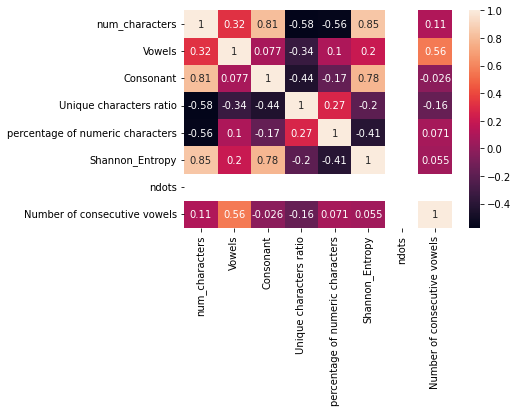

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [ ]:
df1=df.drop(["isDGA"],axis=1)


In [ ]:
df1.head(3)

,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy,ndots,Number of consecutive vowels
0,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.807692,0.653846,4.440224,0,0
1,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.714286,1.000000,3.616875,0,0
2,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.714286,1.000000,3.572469,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
LabelEncoder=LabelEncoder()

In [ ]:
df["isDGA"]=LabelEncoder.fit_transform(df["isDGA"])

In [ ]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy,ndots,Number of consecutive vowels
0,0,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.807692,0.653846,4.440224,0,0
1,0,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.714286,1.000000,3.616875,0,0
2,0,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.714286,1.000000,3.572469,0,0


In [ ]:
X=df1.drop(["host"],axis=1)
y=df["isDGA"]

In [ ]:
X=X.drop(["domain"],axis=1)

In [ ]:
X.head(4)

,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy,ndots,Number of consecutive vowels
0,30,4,16,0.807692,0.653846,4.440224,0,0
1,17,1,15,0.714286,1.000000,3.616875,0,0
2,17,4,12,0.714286,1.000000,3.572469,0,0
3,29,4,14,0.760000,0.600000,4.444188,0,0


In [ ]:
y.head(4)

0    0
1    0
2    0
3    0
Name: isDGA, dtype: int64

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
# from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
# gnb = GaussianNB()
# mnb = MultinomialNB()
# bnb = BernoulliNB()

In [ ]:
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

In [ ]:
# mnb.fit(X_train,y_train)
# y_pred2 = mnb.predict(X_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

In [ ]:
# bnb.fit(X_train,y_train)
# y_pred3 = bnb.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)


In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [ ]:
performance_df1


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Voting Classifier.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[("svm",svc),("et",etc)])

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(y_test)

In [ ]:
print("Accuracy",accuracy_score(y_test))

In [ ]:
print("precision",precision_score(y_test,y_pred))

# Stacking Classifier.

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
estimators=[('SVC' ,svc),('KN' , knc),('NB', mnb), ('DT', dtc),('LR', lrc), ('RF', rfc), ('AdaBoost', abc), ('BgC', bc), ('ETC', etc),('GBDT',gbdt),('xgb',xgb)]

In [ ]:
final_estimator = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators = estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

Accuracy 0.91475
precision 0.8966648767973271


In [ ]:
clf.save("STacking_DGA.h5")

In [ ]:
print(clf.feature_importances_)

In [ ]:
clf.save("/content/drive/MyDrive/DGA_data/STacking_DGA.h5")

# ROC_AUC CURVE

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.savefig('roc.pdf')

# Feature Selection.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(clf,n_features_to_select=4,direction = "Forward")
sfs.fit(X,y)
X_selection = sfs.transform(X)
print(X_selection)

In [ ]:
sfs = SequentialFeatureSelector(clf,n_features_to_select=4,direction = "Forward")


In [ ]:
sfs.fit(X,y)

In [ ]:
X_selection = sfs.transform(X)

In [ ]:
print(X_selection)